## Parametry

In [1]:
MODEL_NAME = "trained_model.h5"
LEARNING_RATE = 0.001

## Wczytanie modelu z pliku

In [2]:
from tensorflow.keras.models import load_model
from tensorflow_core.python.keras.optimizer_v2.rmsprop import RMSProp
from tensorflow.keras.layers import LeakyReLU
from script.main.loss_functions import *

model = load_model('../resources/%s' % MODEL_NAME, compile=False, custom_objects={'LeakyReLU': LeakyReLU})
model.compile(loss=mean_square_loss_func, optimizer=RMSProp(lr=LEARNING_RATE), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 37, 512)           1196032   
_________________________________________________________________
lstm_3 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
dense_1 (Dense)              (None, 19)                9747      
Total params: 3,304,979
Trainable params: 3,304,979
Non-trainable params: 0
_________________________________________________________________


## Wczytanie danych testowych z pliku

In [3]:
import numpy as np

X_test = np.load("../resources/test_data/X_test.npy")
Y_test = np.load("../resources/test_data/Y_test.npy")
test_series = np.load("../resources/data_float16_series_144_compression_119.npy")

## Wyliczenie prognoz na 72h wprzód

In [4]:
print(test_series.shape)
preds = np.zeros(shape=test_series.shape)
preds[:,:,:] = test_series[:,:,:]
preds = preds.transpose(0,2,1)
for i in range(72):
    preds[:,:19,72+i] =  model.predict(preds[:,:,:71])

(14475, 144, 37)


### Porównanie z prawdziwymi pomiarami i wyliczenie błędów

(14475, 37, 144)
[0.1439023  0.17800615 0.20880744 0.23823165 0.26334506 0.28532394
 0.3052265  0.32148667 0.33566135 0.34665387 0.35572296 0.36262206
 0.36811999 0.37004623 0.3688798  0.36745003 0.36412955 0.35862134
 0.35457132 0.34790357 0.34187913 0.33758306 0.33474231 0.33634638
 0.34184941 0.35026175 0.36017623 0.37080297 0.38151897 0.3936177
 0.40253553 0.41024878 0.41779853 0.42224735 0.42639803 0.42764595
 0.42911508 0.42687457 0.42402609 0.41999789 0.41434841 0.40853206
 0.40089157 0.39406819 0.38777242 0.38355099 0.37910566 0.37747447
 0.38102359 0.38617317 0.39586523 0.4048225  0.41362138 0.42213725
 0.43035611 0.43837984 0.44285944 0.44805223 0.45185592 0.45295855
 0.45278892 0.4512608  0.44867651 0.44425184 0.43858116 0.43163163
 0.42578076 0.41799095 0.41069591 0.40568926 0.40063885 0.39959421]


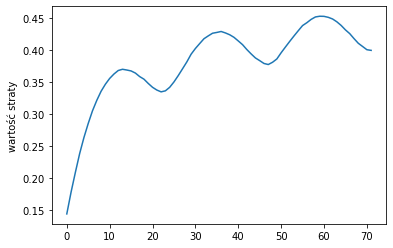

In [5]:
import matplotlib.pyplot as plt
from script.main.loss_functions import *

print(preds.shape)
vals = test_series.transpose(0,2,1)
losses = np.zeros(72)
for i in range(72):
    losses[i]  = error_on_series(preds[:,:,72+i], vals[:,:,72+i])
print(losses)
plt.plot(range(0,72), losses)

plt.ylabel('wartość straty')
plt.show()

### Ewaluacja testowego błędu

In [6]:
results = model.evaluate(X_test, Y_test, batch_size=32)
print('test loss, test acc:', results)

61550/61550 [==============================] - 19s 304us/sample - loss: 0.0916 - accuracy: 0.7094
test loss, test acc: [0.09155335714213647, 0.70939076]
